In [29]:
# pydata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

---

## Read in cleaned data

In [2]:
tweets = pd.read_pickle('cleaned_tweets_data.pkl')

In [3]:
tweets.head()

,created_at,full_text,retweeted,chars
0,2017-12-16 14:29:52-06:00,A list of things that might be useful when ans...,True,166
1,2017-12-16 14:08:52-06:00,OUT: import pdb; pdb.set_trace()\nIN: breakpoi...,True,90
2,2017-12-16 10:46:55-06:00,"Great news, Guido has pronounced dicts to reta...",True,246
3,2017-12-16 07:46:57-06:00,First ever PyCon happening in Pakistan https:/...,True,62
4,2017-12-15 23:14:45-06:00,#python news: 😀 @gvanrossum just pronounced t...,True,137


In [9]:
tweets.dtypes

created_at    datetime64[ns, US/Central]
full_text                         object
retweeted                           bool
chars                              int64
dtype: object

---

## Exploring Data Set

In [5]:
tweets['retweeted'].value_counts()

False    1571
True      998
Name: retweeted, dtype: int64

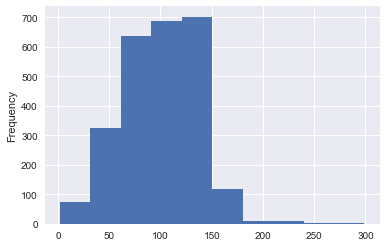

In [7]:
tweets['chars'].plot(kind='hist')

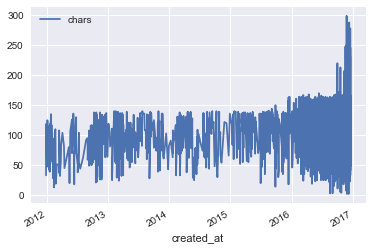

In [11]:
tweets.plot(x='created_at', y='chars')

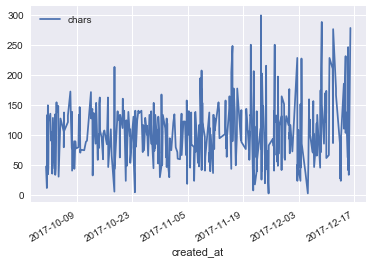

In [20]:
tweets[(tweets['created_at'].dt.year > 2016) & (tweets['created_at'].dt.month > 9)].plot(x='created_at', y='chars')

---

### Investigating Number of Characters

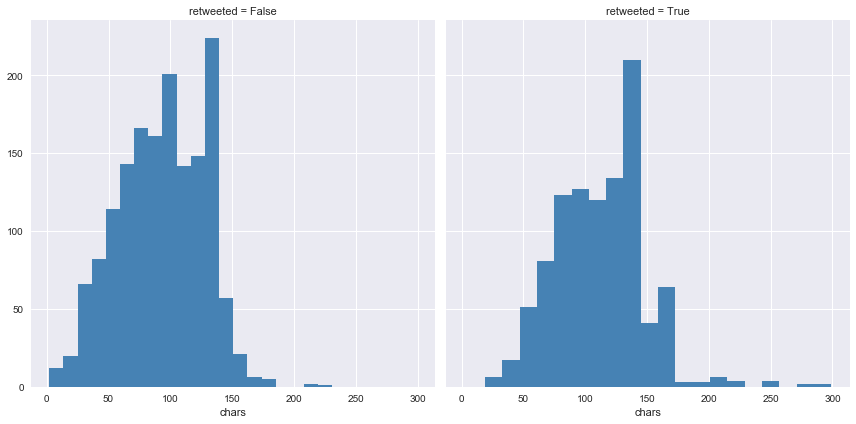

In [42]:
g = sns.FacetGrid(
    tweets,
    col="retweeted",
    margin_titles=True,
    size=6,
)

g.map(
    plt.hist,
    "chars",
    bins=20,
    color="steelblue",
    lw=0,
)

In [22]:
tweets[tweets['retweeted'] == 0]['chars'].describe()

count    1571.000000
mean       92.896881
std        34.951826
min         2.000000
25%        67.000000
50%        95.000000
75%       122.000000
max       231.000000
Name: chars, dtype: float64

In [23]:
tweets[tweets['retweeted'] == 1]['chars'].describe()

count    998.000000
mean     112.032064
std       36.595802
min       19.000000
25%       85.000000
50%      115.000000
75%      137.000000
max      299.000000
Name: chars, dtype: float64

---

## Examining Time Between Posts

In [24]:
# creating function
def time_between(times):
    sorted_times = times.sort_values()
    time_between = sorted_times - sorted_times.shift(1)
    return time_between

In [25]:
def to_seconds(time):
    return time / np.timedelta64(1, 's')

### Examine time between non-RT posts

In [26]:
between_my_posts = time_between(tweets[tweets['retweeted'] == 0]['created_at'])

In [27]:
between_my_posts.describe()

count                      1570
mean     1 days 03:45:52.212101
std      2 days 10:36:24.646605
min             0 days 00:00:08
25%      0 days 01:51:32.500000
50%             0 days 08:37:11
75%      1 days 00:53:16.750000
max            31 days 21:24:50
Name: created_at, dtype: object

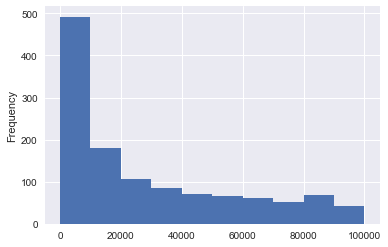

In [30]:
to_seconds(between_my_posts).plot(
    kind='hist',
    range=(0, 100_000)
)

### Examine time between all posts (including RTs)

In [31]:
between_all_posts = time_between(tweets['created_at'])

In [32]:
between_all_posts.describe()

count                      2568
mean     0 days 16:58:35.510903
std      1 days 17:37:38.566048
min             0 days 00:00:03
25%      0 days 00:45:13.750000
50%             0 days 03:12:55
75%      0 days 14:01:24.250000
max            26 days 03:23:07
Name: created_at, dtype: object

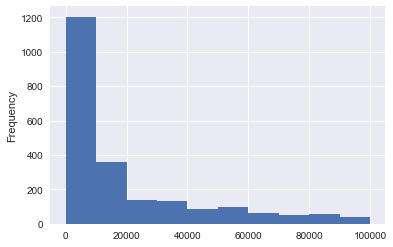

In [33]:
to_seconds(between_all_posts).plot(
    kind='hist',
    range=(0, 100_000)
)

---

# Draw Heatmap to Display Tweet Times

In [34]:
tweets['hour'] = tweets['created_at'].dt.hour
tweets['day_of_week'] = tweets['created_at'].dt.dayofweek

In [35]:
days_of_week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

### All Posts

In [36]:
tweets_timeline = tweets.groupby(by=['hour', 'day_of_week'])['full_text'].count()

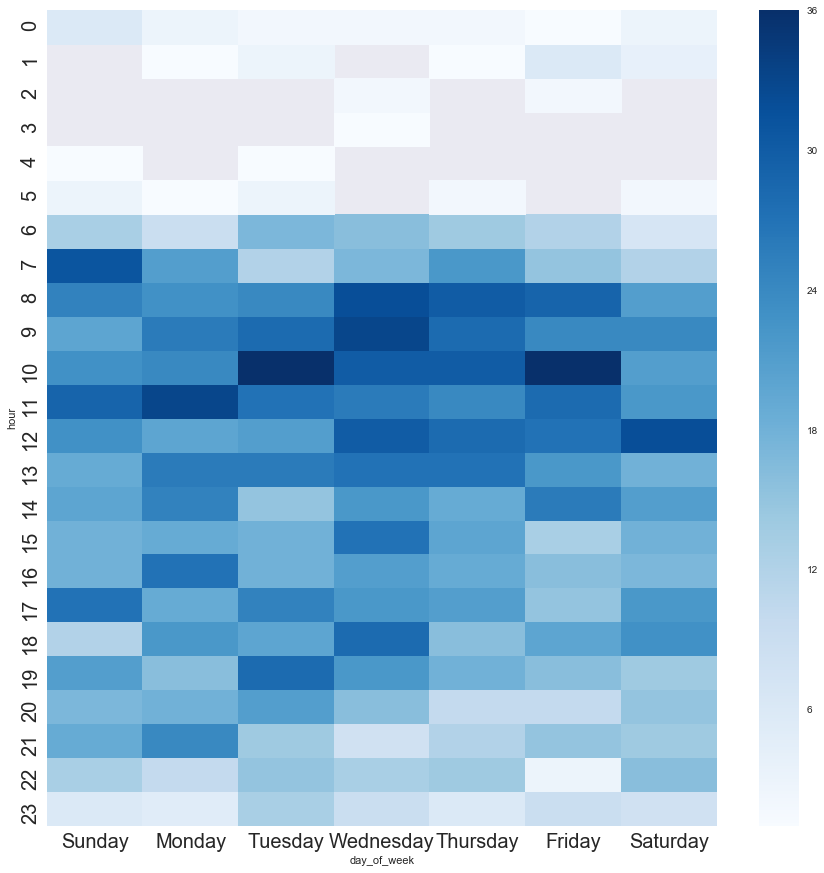

In [37]:
plt.figure(figsize=(15, 15))
ax = (sns.heatmap(tweets_timeline.unstack(),
                  cmap='Blues',
                  xticklabels=days_of_week))

# Set the tick labels font (#figure out how to send it in as kwargs)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
#     label.set_fontname('Arial')
    label.set_fontsize(20)

### Original Posts (non-RTed)

In [38]:
tweets_timeline = tweets[tweets['retweeted'] == 0].groupby(by=['hour', 'day_of_week'])['full_text'].count()

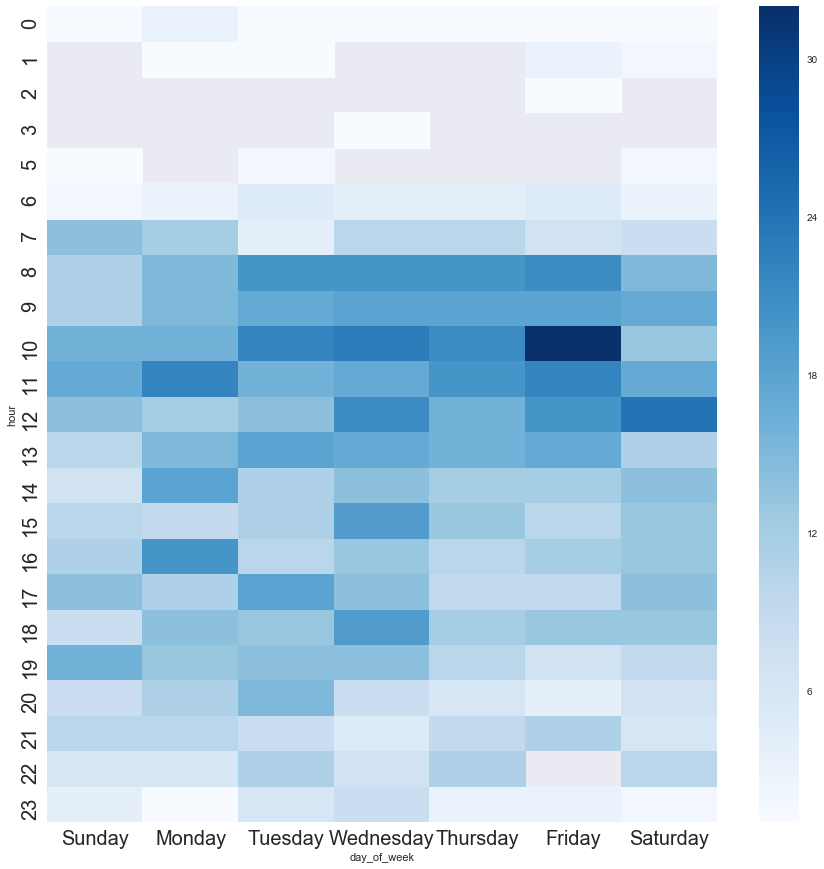

In [39]:
plt.figure(figsize=(15, 15))
ax = (sns.heatmap(tweets_timeline.unstack(),
                  cmap='Blues',
                  xticklabels=days_of_week))

# Set the tick labels font (#figure out how to send it in as kwargs)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
#     label.set_fontname('Arial')
    label.set_fontsize(20)

### Retweeted Posts

In [40]:
tweets_timeline = tweets[tweets['retweeted'] == 1].groupby(by=['hour', 'day_of_week'])['full_text'].count()

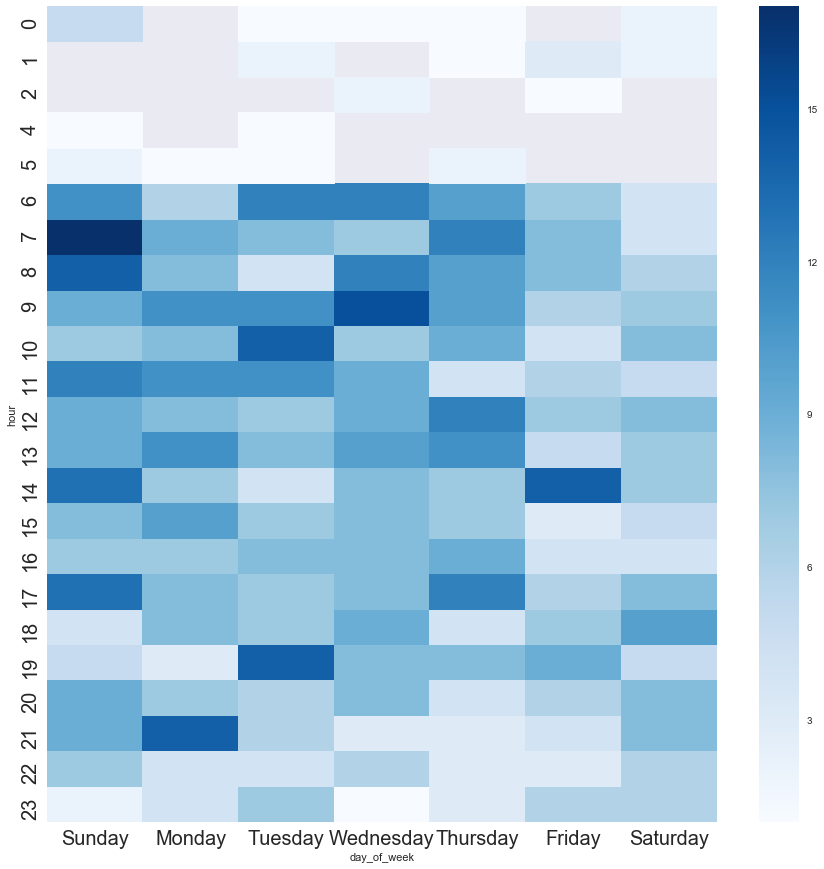

In [41]:
plt.figure(figsize=(15, 15))
ax = (sns.heatmap(tweets_timeline.unstack(),
                  cmap='Blues',
                  xticklabels=days_of_week))

# Set the tick labels font (#figure out how to send it in as kwargs)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
#     label.set_fontname('Arial')
    label.set_fontsize(20)